In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [ ]:
df= pd.read_csv('/content/Suicide_Data.csv')

In [ ]:
df.head()

,Text,Class
0,#27clubi turn 27 in 16 days i wanna leave my w...,suicide
1,#3737 is the parking stall number my body woul...,suicide
2,#4girlfriend stayed home to make sure im allri...,suicide
3,#5decided im too much of pussy to kill myselfi...,suicide
4,#crazysockz4docsas someone who will one day be...,suicide


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9318 entries, 0 to 9317
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    9318 non-null   object
 1   Class   9318 non-null   object
dtypes: object(2)
memory usage: 145.7+ KB


In [ ]:
df.isnull().sum()

Text     0
Class    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


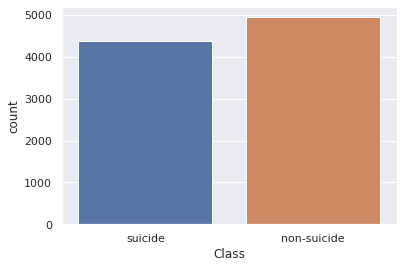

In [ ]:
import seaborn as sns
sns.set()
#plotting the gender col in count plot
sns.countplot(df['Class'])

In [ ]:
categorical_cols = ['Class'] 

from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

In [ ]:
df['Class'].unique()

array([1, 0])

In [ ]:
df.head(10)

,Text,Class
0,#27clubi turn 27 in 16 days i wanna leave my w...,1
1,#3737 is the parking stall number my body woul...,1
2,#4girlfriend stayed home to make sure im allri...,1
3,#5decided im too much of pussy to kill myselfi...,1
4,#crazysockz4docsas someone who will one day be...,1
5,#it feels like god doesnt want to live or be h...,1
6,#phx choosing life over loveim not from here u...,1
7,_ _ been off zoloft for 2 weeks and i dont mis...,1
8,_ _ i dont want to enter 2018 i dont want to l...,1
9,_ _ well my old friends dont need anymore if t...,1


In [ ]:
x = df.Text.values
y = df['Class'].values
print(type(y))

<class 'numpy.ndarray'>


In [ ]:
A = df['Class']
print(type(A))

<class 'pandas.core.series.Series'>


**CNN**

In [ ]:
import pandas as pd
import numpy as np
import time

from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.preprocessing.text import Tokenizer, one_hot
from keras.preprocessing.sequence import pad_sequences

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import matplotlib.pyplot as plt

In [ ]:
RANDOM_STATE = 42

# Split train & test
text_train, text_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE)

# Tokenize and transform to integer index
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_train)

X_train = tokenizer.texts_to_sequences(text_train)
X_test = tokenizer.texts_to_sequences(text_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
# maxlen = max(len(x) for x in X_train) # longest text in train set
maxlen= 200
# print(maxlen)

# Add pading to ensure all vectors have same dimensionality
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
print(X_test)

[[ 280 1701    5 ...    0    0    0]
 [  59  159    2 ...    0    0    0]
 [  68 9210  151 ...    0    0    0]
 ...
 [  59 1898 5905 ...    0    0    0]
 [  59  103   41 ...    0    0    0]
 [ 520  211   18 ...    0    0    0]]


In [ ]:
# Define CNN architecture

embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
print(model.summary())

# Fit model
history_cnn = model.fit(X_train, y_train,
                    epochs=5,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          3225700   
                                                                 
 conv1d (Conv1D)             (None, 196, 128)          64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 3,291,129
Trainable params: 3,291,129
Non-trainable params: 0
______________________________________________

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

In [ ]:
import numpy as np

y_predicted_cnn = np.where(y_predicted > 0.5, 1, 0)
y_predicted_cnn

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_predicted_cnn)) 

Accuracy: 0.89431330472103


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

labels = ['non-suicidal', 'suicidal']
print(classification_report(y_test, y_predicted_cnn))
pd.DataFrame(confusion_matrix(y_test, y_predicted_cnn), index=labels, columns=labels)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       959
           1       0.90      0.88      0.89       905

    accuracy                           0.89      1864
   macro avg       0.89      0.89      0.89      1864
weighted avg       0.89      0.89      0.89      1864



,non-suicidal,suicidal
non-suicidal,868,91
suicidal,106,799


Text(0.5, 257.44, 'Predicted label')

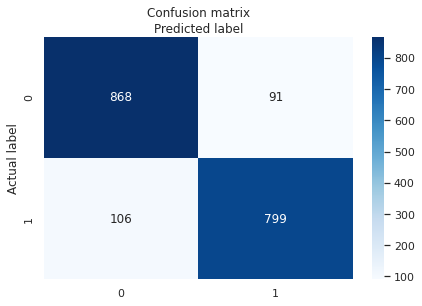

In [ ]:
from sklearn import metrics
cnf_matrix_cnn = metrics.confusion_matrix(y_test, y_predicted_cnn)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_cnn), annot=True, cmap=plt.cm.Blues ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
history_cnn.history??

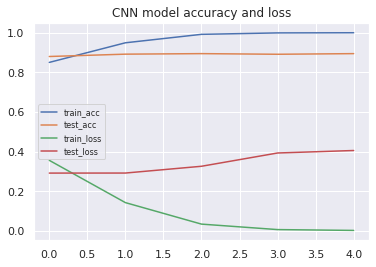

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])

# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train_acc','test_acc'], loc='lower left')
# plt.show()

plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])

plt.title('CNN model accuracy and loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
plt.legend(['train_acc','test_acc','train_loss','test_loss'], fontsize=8)
plt.show()

**RNN**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import SimpleRNN, Activation, Dense, Dropout, Input, Embedding, LSTM

from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

from keras.callbacks import EarlyStopping

In [ ]:
# Y = y.reshape(-1,1)

In [ ]:
# X_train,X_test,Y_train,Y_test = train_test_split(x,Y,test_size=0.2,random_state= 20)

In [ ]:
print(X_test)

[[ 280 1701    5 ...    0    0    0]
 [  59  159    2 ...    0    0    0]
 [  68 9210  151 ...    0    0    0]
 ...
 [  59 1898 5905 ...    0    0    0]
 [  59  103   41 ...    0    0    0]
 [ 520  211   18 ...    0    0    0]]


In [ ]:
def RNNmodel():
    inputs = Input(name='inputs',shape=[maxlen])
    layer = Embedding(vocab_size,100,input_length=maxlen)(inputs)
    layer = SimpleRNN(32)(layer)
    layer = Dense(256,name='FC1',activation='relu')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
import tensorflow as tf

In [ ]:
model_rnn = RNNmodel()
model_rnn.summary()
model_rnn.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy',tf.keras.metrics.Precision()])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 200)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 200, 100)          3225700   
                                                                 
 lstm (LSTM)                 (None, 32)                17024     
                                                                 
 FC1 (Dense)                 (None, 256)               8448      
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [ ]:
history_rnn= model_rnn.fit(X_train,y_train,batch_size=128,epochs=7, validation_split=0.2)

Epoch 1/7
47/47 [==============================] - 5s 29ms/step - loss: 0.6632 - accuracy: 0.6456 - precision: 0.6517 - val_loss: 0.5974 - val_accuracy: 0.6901 - val_precision: 0.9049
Epoch 2/7
47/47 [==============================] - 1s 24ms/step - loss: 0.5809 - accuracy: 0.7043 - precision: 0.7761 - val_loss: 0.5596 - val_accuracy: 0.7163 - val_precision: 0.9040
Epoch 3/7
47/47 [==============================] - 1s 30ms/step - loss: 0.5222 - accuracy: 0.7503 - precision: 0.7914 - val_loss: 0.4891 - val_accuracy: 0.8075 - val_precision: 0.9731
Epoch 4/7
47/47 [==============================] - 1s 28ms/step - loss: 0.3329 - accuracy: 0.8962 - precision: 0.9037 - val_loss: 0.3742 - val_accuracy: 0.8786 - val_precision: 0.8539
Epoch 5/7
47/47 [==============================] - 1s 29ms/step - loss: 0.2990 - accuracy: 0.9094 - precision: 0.8754 - val_loss: 0.3416 - val_accuracy: 0.8833 - val_precision: 0.8452
Epoch 6/7
47/47 [==============================] - 1s 26ms/step - loss: 0.2704 -

In [ ]:
y_predicted_rnn = model_rnn.predict(X_test)

In [ ]:
y_predicted_rnn

array([[0.7358034 ],
       [0.03755117],
       [0.7358034 ],
       ...,
       [0.0375516 ],
       [0.7358035 ],
       [0.73586565]], dtype=float32)

In [ ]:
y_predicted_rnn = y_predicted_rnn.flatten()

In [ ]:
y_predicted_rnn = np.where(y_predicted_rnn > 0.5, 1, 0)
y_predicted_rnn

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_predicted_rnn)) 

Accuracy: 0.782725321888412


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

labels = ['non-suicidal', 'suicidal']
print(classification_report(y_test, y_predicted_rnn))
pd.DataFrame(confusion_matrix(y_test, y_predicted_rnn), index=labels, columns=labels)

              precision    recall  f1-score   support

           0       0.96      0.60      0.74       959
           1       0.70      0.98      0.81       905

    accuracy                           0.78      1864
   macro avg       0.83      0.79      0.78      1864
weighted avg       0.83      0.78      0.78      1864



,non-suicidal,suicidal
non-suicidal,575,384
suicidal,21,884


Text(0.5, 257.44, 'Predicted label')

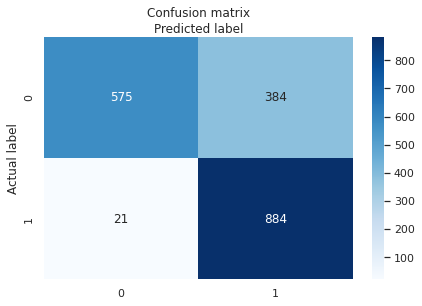

In [ ]:
from sklearn import metrics
cnf_matrix_rnn = metrics.confusion_matrix(y_test, y_predicted_rnn)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_rnn), annot=True, cmap=plt.cm.Blues ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

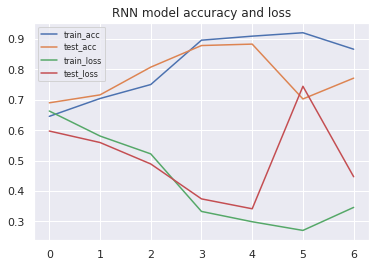

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_rnn.history['accuracy'])
plt.plot(history_rnn.history['val_accuracy'])

# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train_acc','test_acc'], loc='lower left')
# plt.show()

plt.plot(history_rnn.history['loss'])
plt.plot(history_rnn.history['val_loss'])

plt.title('RNN model accuracy and loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
plt.legend(['train_acc','test_acc','train_loss','test_loss'], fontsize=8)
plt.show()

**LSTM**

In [ ]:
# We begin by defining the a empty stack. We'll use this for building our 
# network, later by layer.
model_lstm = tf.keras.models.Sequential()

# The Embedding Layer provides a spatial mapping (or Word Embedding) of all the 
# individual words in our training set. Words close to one another share context 
# and or meaning. This spatial mapping is learning during the training process.
model_lstm.add(
    tf.keras.layers.Embedding(
        input_dim = vocab_size, # The size of our vocabulary 
        output_dim = 32, # Dimensions to which each words shall be mapped
        input_length = maxlen # Length of input sequences
    )
)

# Dropout layers fight overfitting and forces the model to learn multiple 
# representations of the same data by randomly disabling neurons in the 
# learning phase.
model_lstm.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

# We are using a fast version of LSTM whih is optimised for GPUs. This layer 
# looks at the sequence of words in the review, along with their word embeddings
# and uses both of these to determine to sentiment of a given review.
model_lstm.add(
    
    tf.keras.layers.LSTM(
        units=32 # 32 LSTM units in this layer
    )
)

# Add a second dropout layer with the same aim as the first.
model_lstm.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

# All LSTM units are connected to a single node in the dense layer. A sigmoid 
# activation function determines the output from this node - a value 
# between 0 and 1. Closer to 0 indicates a negative review. Closer to 1 
# indicates a positive review.
model_lstm.add(
    tf.keras.layers.Dense(
        units=1, # Single unit
        activation='sigmoid' # Sigmoid activation function (output from 0 to 1)
    )
)

# Compile the model
model_lstm.compile(
    loss=tf.keras.losses.binary_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimiser function
    metrics=['accuracy']) # reporting metric

# Display a summary of the models structure
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 32)           1032224   
                                                                 
 dropout_1 (Dropout)         (None, 200, 32)           0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,040,577
Trainable params: 1,040,577
Non-trainable params: 0
_________________________________________________________________


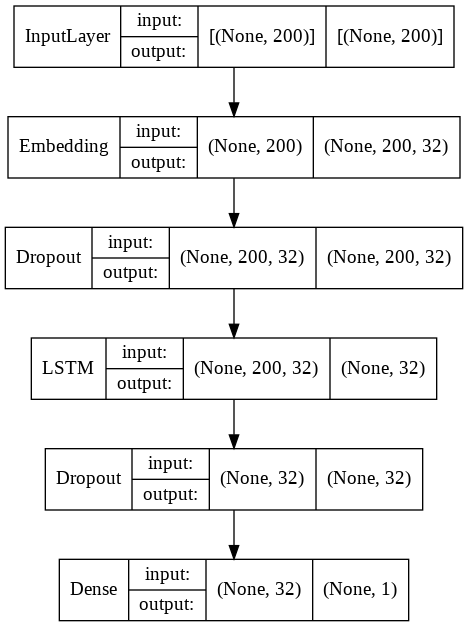

In [ ]:
tf.keras.utils.plot_model(model_lstm, to_file='model.png', show_shapes=True, show_layer_names=False)

In [ ]:
# Train the LSTM on the training data
history_lstm = model_lstm.fit(

    # Training data : features (review) and classes (positive or negative)
    X_train, y_train,
                    
    # Number of samples to work through before updating the 
    # internal model parameters via back propagation. The 
    # higher the batch, the more memory you need.
    batch_size=256, 

    # An epoch is an iteration over the entire training data.
    epochs=8, 
    
    # The model will set apart his fraction of the training 
    # data, will not train on it, and will evaluate the loss
    # and any model metrics on this data at the end of 
    # each epoch.
    validation_split=0.2,
    
    verbose=1
) 

Epoch 1/8
24/24 [==============================] - 3s 39ms/step - loss: 0.6820 - accuracy: 0.5351 - val_loss: 0.6702 - val_accuracy: 0.6338
Epoch 2/8
24/24 [==============================] - 0s 13ms/step - loss: 0.6345 - accuracy: 0.6757 - val_loss: 0.5385 - val_accuracy: 0.7518
Epoch 3/8
24/24 [==============================] - 0s 13ms/step - loss: 0.5692 - accuracy: 0.7154 - val_loss: 0.5247 - val_accuracy: 0.7619
Epoch 4/8
24/24 [==============================] - 0s 15ms/step - loss: 0.5442 - accuracy: 0.7401 - val_loss: 0.5140 - val_accuracy: 0.7612
Epoch 5/8
24/24 [==============================] - 0s 13ms/step - loss: 0.5267 - accuracy: 0.7454 - val_loss: 0.5113 - val_accuracy: 0.7337
Epoch 6/8
24/24 [==============================] - 0s 13ms/step - loss: 0.4353 - accuracy: 0.8142 - val_loss: 0.3392 - val_accuracy: 0.8880
Epoch 7/8
24/24 [==============================] - 0s 13ms/step - loss: 0.3328 - accuracy: 0.8918 - val_loss: 0.3446 - val_accuracy: 0.8820
Epoch 8/8
24/24 [===

In [ ]:
y_predicted_lstm = model_lstm.predict(X_test)

In [ ]:
y_predicted_lstm = y_predicted_lstm.flatten()

In [ ]:
y_predicted_lstm = np.where(y_predicted_lstm > 0.5, 1, 0)
y_predicted_lstm

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_predicted_lstm)) 

Accuracy: 0.8524678111587983


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

labels = ['non-suicidal', 'suicidal']
print(classification_report(y_test, y_predicted_rnn))
pd.DataFrame(confusion_matrix(y_test, y_predicted_rnn), index=labels, columns=labels)

              precision    recall  f1-score   support

           0       0.96      0.60      0.74       959
           1       0.70      0.98      0.81       905

    accuracy                           0.78      1864
   macro avg       0.83      0.79      0.78      1864
weighted avg       0.83      0.78      0.78      1864



,non-suicidal,suicidal
non-suicidal,575,384
suicidal,21,884


Text(0.5, 257.44, 'Predicted label')

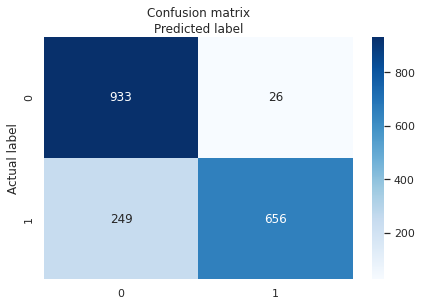

In [ ]:
from sklearn import metrics
cnf_matrix_lstm = metrics.confusion_matrix(y_test, y_predicted_lstm)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_lstm), annot=True, cmap=plt.cm.Blues ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

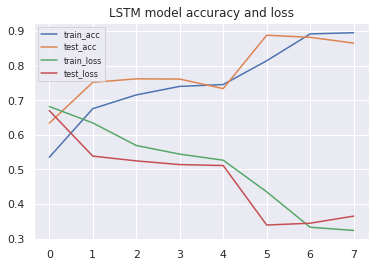

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])

# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train_acc','test_acc'], loc='lower left')
# plt.show()

plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])

plt.title('LSTM model accuracy and loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
plt.legend(['train_acc','test_acc','train_loss','test_loss'], fontsize=8)
plt.show()

**Bi-LSTM**

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

max_features = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review

In [ ]:
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# Add a classifier
outputs = layers.Dense(1, activation="sigmoid")(x)
model_bi_lstm = keras.Model(inputs, outputs)
model_bi_lstm.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_3 (Embedding)     (None, None, 128)         2560000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,757,761
Trainable params: 2,757,761
Non-tra

In [ ]:
model_bi_lstm.compile("adam", "binary_crossentropy", metrics=["accuracy"])
history_bi_lstm= model_bi_lstm.fit(X_train, y_train, batch_size=128, epochs=5, validation_split=0.2)

Epoch 1/5
47/47 [==============================] - 14s 143ms/step - loss: 0.5143 - accuracy: 0.7572 - val_loss: 0.3199 - val_accuracy: 0.8753
Epoch 2/5
47/47 [==============================] - 4s 81ms/step - loss: 0.2143 - accuracy: 0.9205 - val_loss: 0.2252 - val_accuracy: 0.9162
Epoch 3/5
47/47 [==============================] - 4s 91ms/step - loss: 0.1002 - accuracy: 0.9666 - val_loss: 0.2486 - val_accuracy: 0.8920
Epoch 4/5
47/47 [==============================] - 4s 80ms/step - loss: 0.0596 - accuracy: 0.9819 - val_loss: 0.2605 - val_accuracy: 0.9068
Epoch 5/5
47/47 [==============================] - 3s 66ms/step - loss: 0.0348 - accuracy: 0.9908 - val_loss: 0.3314 - val_accuracy: 0.8954


In [ ]:
y_predicted_bi_lstm = model_bi_lstm.predict(X_test)

In [ ]:
y_predicted_bi_lstm = y_predicted_bi_lstm.flatten()

In [ ]:
y_predicted_bi_lstm = np.where(y_predicted_bi_lstm > 0.5, 1, 0)
y_predicted_bi_lstm

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_predicted_bi_lstm)) 

Accuracy: 0.8921673819742489


In [ ]:
labels = ['non-suicidal', 'suicidal']
print(classification_report(y_test, y_predicted_bi_lstm))
pd.DataFrame(confusion_matrix(y_test, y_predicted_bi_lstm), index=labels, columns=labels)

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       959
           1       0.88      0.90      0.89       905

    accuracy                           0.89      1864
   macro avg       0.89      0.89      0.89      1864
weighted avg       0.89      0.89      0.89      1864



,non-suicidal,suicidal
non-suicidal,846,113
suicidal,88,817


Text(0.5, 257.44, 'Predicted label')

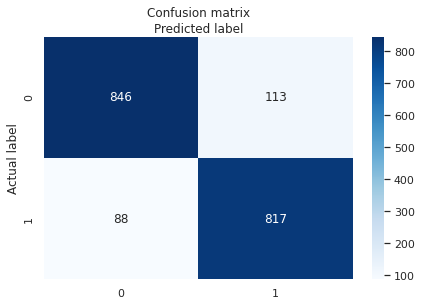

In [ ]:
from sklearn import metrics
cnf_matrix_bi_lstm = metrics.confusion_matrix(y_test, y_predicted_bi_lstm)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_bi_lstm), annot=True, cmap=plt.cm.Blues ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

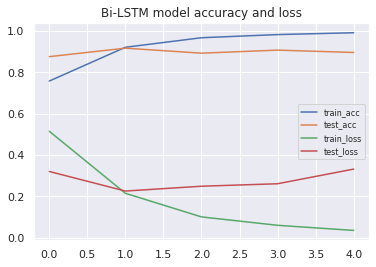

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_bi_lstm.history['accuracy'])
plt.plot(history_bi_lstm.history['val_accuracy'])

# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train_acc','test_acc'], loc='lower left')
# plt.show()

plt.plot(history_bi_lstm.history['loss'])
plt.plot(history_bi_lstm.history['val_loss'])

plt.title('Bi-LSTM model accuracy and loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
plt.legend(['train_acc','test_acc','train_loss','test_loss'], fontsize=8)
plt.show()

**GRU**

In [ ]:
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                             input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 200, 100)          3225700   
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               25728     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 3,252,089
Trainable params: 3,252,089
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_gru.compile(loss="binary_crossentropy",
             optimizer='adam',
             metrics=['accuracy'])
history_gru= model_gru.fit(X_train,y_train,batch_size=128,epochs=7, validation_split= 0.2)

Epoch 1/7
47/47 [==============================] - 5s 37ms/step - loss: 0.6338 - accuracy: 0.6669 - val_loss: 0.5203 - val_accuracy: 0.7887
Epoch 2/7
47/47 [==============================] - 1s 22ms/step - loss: 0.3227 - accuracy: 0.8717 - val_loss: 0.2711 - val_accuracy: 0.8947
Epoch 3/7
47/47 [==============================] - 1s 22ms/step - loss: 0.1417 - accuracy: 0.9539 - val_loss: 0.2673 - val_accuracy: 0.9088
Epoch 4/7
47/47 [==============================] - 1s 22ms/step - loss: 0.0653 - accuracy: 0.9822 - val_loss: 0.3039 - val_accuracy: 0.8927
Epoch 5/7
47/47 [==============================] - 1s 21ms/step - loss: 0.0289 - accuracy: 0.9936 - val_loss: 0.3711 - val_accuracy: 0.8974
Epoch 6/7
47/47 [==============================] - 1s 21ms/step - loss: 0.0199 - accuracy: 0.9956 - val_loss: 0.3557 - val_accuracy: 0.8913
Epoch 7/7
47/47 [==============================] - 1s 22ms/step - loss: 0.0112 - accuracy: 0.9980 - val_loss: 0.4908 - val_accuracy: 0.8820


In [ ]:
y_predicted_gru = model_gru.predict(X_test)

In [ ]:
y_predicted_gru = y_predicted_gru.flatten()
y_predicted_gru.shape

(1864,)

In [ ]:
y_predicted_gru = np.where(y_predicted_gru > 0.5, 1, 0)
y_predicted_gru

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_predicted_gru)) 

Accuracy: 0.8841201716738197


In [ ]:
labels = ['non-suicidal', 'suicidal']
print(classification_report(y_test, y_predicted_gru))
pd.DataFrame(confusion_matrix(y_test, y_predicted_gru), index=labels, columns=labels)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       959
           1       0.90      0.86      0.88       905

    accuracy                           0.88      1864
   macro avg       0.88      0.88      0.88      1864
weighted avg       0.88      0.88      0.88      1864



,non-suicidal,suicidal
non-suicidal,870,89
suicidal,127,778


Text(0.5, 257.44, 'Predicted label')

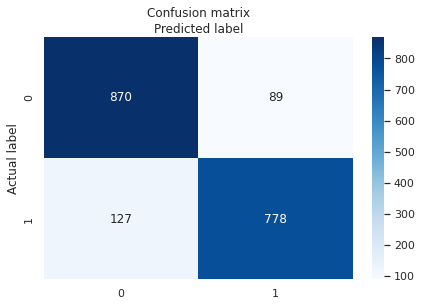

In [ ]:
from sklearn import metrics
cnf_matrix_gru = metrics.confusion_matrix(y_test, y_predicted_gru)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_gru), annot=True, cmap=plt.cm.Blues ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

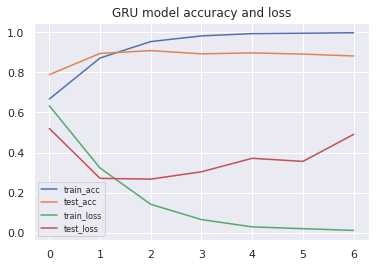

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_gru.history['accuracy'])
plt.plot(history_gru.history['val_accuracy'])

# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train_acc','test_acc'], loc='lower left')
# plt.show()

plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])

plt.title('GRU model accuracy and loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
plt.legend(['train_acc','test_acc','train_loss','test_loss'], fontsize=8)
plt.show()

**Bi-GRU**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU, Dropout, Bidirectional, SpatialDropout1D

In [ ]:
model_bi_gru = Sequential()

model_bi_gru.add(Embedding(max_features, 125, input_length=maxlen))
model_bi_gru.add(SpatialDropout1D(0.2))
model_bi_gru.add(Bidirectional(GRU(75)))
model_bi_gru.add(Dropout(0.2))

model_bi_gru.add(Dense(5, activation='sigmoid'))

In [ ]:
epochs = 7
batch_size = 32

In [ ]:
model_bi_gru.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
# model_bi_gru.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size)

history_bi_gru= model_bi_gru.fit(X_train,y_train,batch_size=128,epochs=7, validation_split=0.2)

Epoch 1/7


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


47/47 [==============================] - 6s 42ms/step - loss: 0.8769 - accuracy: 0.6145 - val_loss: 0.5280 - val_accuracy: 0.7706
Epoch 2/7
47/47 [==============================] - 1s 27ms/step - loss: 0.4184 - accuracy: 0.8142 - val_loss: 0.2806 - val_accuracy: 0.8940
Epoch 3/7
47/47 [==============================] - 1s 27ms/step - loss: 0.2136 - accuracy: 0.9200 - val_loss: 0.2719 - val_accuracy: 0.8934
Epoch 4/7
47/47 [==============================] - 1s 27ms/step - loss: 0.1149 - accuracy: 0.9596 - val_loss: 0.2731 - val_accuracy: 0.9027
Epoch 5/7
47/47 [==============================] - 1s 27ms/step - loss: 0.0666 - accuracy: 0.9800 - val_loss: 0.3133 - val_accuracy: 0.8920
Epoch 6/7
47/47 [==============================] - 1s 27ms/step - loss: 0.0377 - accuracy: 0.9901 - val_loss: 0.3574 - val_accuracy: 0.8746
Epoch 7/7
47/47 [==============================] - 1s 31ms/step - loss: 0.0319 - accuracy: 0.9903 - val_loss: 0.4513 - val_accuracy: 0.8900


In [ ]:
y_predicted_bi = model_bi_gru.predict(X_test)

print(y_predicted_bi.shape)

(1864, 5)


In [ ]:
y_predicted_bi

array([[9.9618065e-01, 7.7325141e-01, 1.8445371e-02, 2.8351778e-02,
        4.0681954e-02],
       [9.9887854e-01, 4.3290615e-01, 2.3370799e-02, 3.7006158e-02,
        4.4839364e-02],
       [9.9823135e-01, 4.3330187e-01, 2.7880106e-02, 4.7474161e-02,
        5.6468926e-02],
       ...,
       [9.9688989e-01, 8.8188767e-01, 1.0881497e-02, 1.5219764e-02,
        2.4052793e-02],
       [9.3740547e-01, 9.9962950e-01, 1.8561594e-03, 1.0177454e-03,
        4.7599101e-03],
       [7.2543293e-01, 9.9996126e-01, 1.4977048e-03, 8.3579717e-04,
        3.7394257e-03]], dtype=float32)

In [ ]:
y_predicted_bi_gru = y_predicted_bi.flatten()
print(y_predicted_bi_gru.shape)

(9320,)


In [ ]:
y_predicted_bi_gru = np.where(y_predicted_bi_gru > 0.5, 1, 0)



In [ ]:
y_predicted_bi_gru.shape

(9320,)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_predicted_bi_gru))

ValueError: ignored

In [ ]:
labels = ['non-suicidal', 'suicidal']
print(classification_report(y_test, y_predicted_bi_gru))
pd.DataFrame(confusion_matrix(y_test, y_predicted_bi_gru), index=labels, columns=labels)

ValueError: ignored

In [ ]:
from sklearn import metrics
cnf_matrix_bi_gru = metrics.confusion_matrix(y_test, y_predicted_bi_gru)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_bi_gru), annot=True, cmap=plt.cm.Blues ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

ValueError: ignored